# Logistic Regression and PCA - Telecom Churn Dataset

In [846]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [847]:
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

### Checking Data

In [849]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [850]:
churn_data.shape

(7043, 9)

In [851]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [852]:
customer_data.shape

(7043, 5)

In [853]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [854]:
internet_data.shape

(7043, 9)

In [855]:
# It can be seen that all three dataframes have Customet ID as a common feature and have equal no of rows = 7043

In [856]:
# Merging DataFrames
df1 = pd.merge(churn_data, customer_data , on = 'customerID', how = 'inner')
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [857]:
df1.shape

(7043, 13)

In [858]:
churn = pd.merge(df1, internet_data, on = 'customerID', how = 'inner')
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [859]:
churn.shape

(7043, 21)

### Checking for missing values

In [860]:
churn.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

#### There are no missing values in the data set


In [862]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Checking DataTypes

In [863]:
churn.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

### Statistical description

In [864]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00


In [865]:
# Finding value_counts
for i in churn.columns:
    print(churn[i].value_counts(normalize = True)*100)
    print('*'*50)

9904-EHEVJ    0.014198
9415-DPEWS    0.014198
1493-AMTIE    0.014198
3097-FQTVJ    0.014198
6894-LFHLY    0.014198
                ...   
7025-WCBNE    0.014198
5553-AOINX    0.014198
2821-WARNZ    0.014198
4298-OYIFC    0.014198
4859-ZSRDZ    0.014198
Name: customerID, Length: 7043, dtype: float64
**************************************************
1     8.703677
72    5.139855
2     3.379242
3     2.839699
4     2.498935
        ...   
28    0.809314
39    0.795116
44    0.724123
36    0.709925
0     0.156183
Name: tenure, Length: 73, dtype: float64
**************************************************
Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64
**************************************************
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64
**************************************************
Yes    59.221922
No     40.778078
Name: PaperlessBilling, dtype: float64
*********************************

In [866]:
churn.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [867]:
a = ['PhoneService', 'SeniorCitizen', ] # Highly biased
b = [ 'PaperlessBilling', 'Churn',  'Partner', 'Dependents',  ] # Yes No

In [868]:
churn.drop(a, axis = 1, inplace = True)

In [869]:
churn[b].head()

,PaperlessBilling,Churn,Partner,Dependents
0,Yes,No,Yes,No
1,No,No,No,No
2,Yes,Yes,No,No
3,No,No,No,No
4,Yes,Yes,No,No


In [870]:
for i in b:
    churn[i] = churn[i].apply(lambda x: 1 if x == 'Yes' else 0)
churn.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,Month-to-month,1,Electronic check,29.85,29.85,0,Female,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,No,Fiber optic,No,No,No,No,No,No


In [871]:
churn['gender'] = churn['gender'].map({'Male' : 1, 'Female' : 0})
churn.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,One year,0,Mailed check,56.95,1889.5,0,1,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [872]:
dummy = [ 'Contract',  'PaymentMethod','MultipleLines', 'InternetService','OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

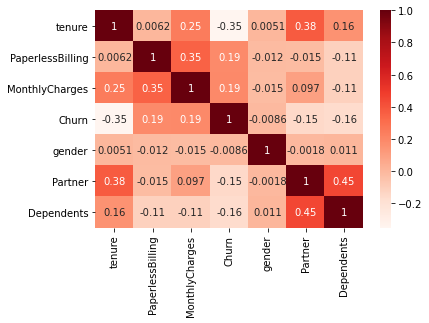

In [873]:
sns.heatmap(churn.corr(), annot = True, cmap = 'Reds')

In [874]:
for i in dummy:
    
    churn = pd.get_dummies(churn, prefix = [i], columns = [i],  drop_first= False)
    
churn.head()

,customerID,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,Contract_Month-to-month,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,1,29.85,29.85,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,0,56.95,1889.5,0,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,1,53.85,108.15,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,42.30,1840.75,0,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,2,1,70.70,151.65,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [875]:
churn.columns

Index(['customerID', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender', 'Partner', 'Dependents',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'Str

In [876]:
to_drop = ['customerID', 'Contract_One year', 'PaymentMethod_Credit card (automatic)', 'MultipleLines_Yes',
       'InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',
      'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service',]

In [877]:
churn.drop(to_drop, axis = 1, inplace = True)
churn.head()

,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,Contract_Month-to-month,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,1,29.85,29.85,0,0,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,34,0,56.95,1889.5,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,53.85,108.15,1,1,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,42.30,1840.75,0,1,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,70.70,151.65,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [878]:
churn.shape

(7043, 29)

In [879]:
churn['TotalCharges'].apply(type).value_counts()

<class 'str'>    7043
Name: TotalCharges, dtype: int64

In [880]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors = 'coerce')
churn['TotalCharges'].isnull().sum()

11

In [881]:
churn.dropna(axis = 0, inplace = True)
churn.shape

(7032, 29)

In [882]:
churn.dtypes 

tenure                                       int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender                                       int64
Partner                                      int64
Dependents                                   int64
Contract_Month-to-month                      uint8
Contract_Two year                            uint8
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Electronic check               uint8
PaymentMethod_Mailed check                   uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
OnlineSecurity_No                            uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

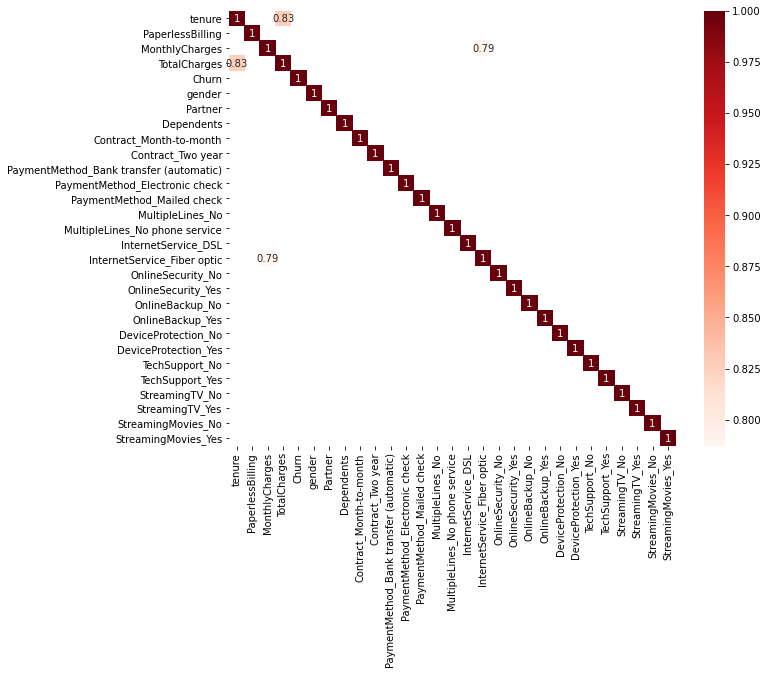

In [883]:
plt.figure(figsize = (10, 8))
sns.heatmap(churn.corr()[(churn.corr() > 0.75)|(churn.corr()<-0.75)], annot = True, cmap = 'Reds')

### Checking Null

In [885]:
churn.isnull().sum()

tenure                                     0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender                                     0
Partner                                    0
Dependents                                 0
Contract_Month-to-month                    0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
MultipleLines_No                           0
MultipleLines_No phone service             0
InternetService_DSL                        0
InternetService_Fiber optic                0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProt

### Checking Outliers

In [887]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
churn.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,69.000,72.0000,72.0000,72.00
PaperlessBilling,7032.0,0.592719,0.491363,0.00,0.0000,1.000,1.0000,1.000,1.0000,1.0000,1.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,102.645,107.4225,114.7345,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,5976.640,6923.5900,8039.8830,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.000,1.0000,1.0000,1.00
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.000,1.0000,1.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.000,1.0000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.000,1.0000,1.0000,1.00
Contract_Month-to-month,7032.0,0.551052,0.497422,0.00,0.0000,1.000,1.0000,1.000,1.0000,1.0000,1.00
Contract_Two year,7032.0,0.239619,0.426881,0.00,0.0000,0.000,0.0000,1.000,1.0000,1.0000,1.00


In [888]:
# There are no outliers

In [889]:
to_scale = churn[['tenure', 'MonthlyCharges', 'TotalCharges']]
to_scale.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


### Standardizing

In [890]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(to_scale)

new = pd.DataFrame(scaled, columns = ['tenure', 'MonthlyCharges', 'TotalCharges'])
churn.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1, inplace = True)
new.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


In [891]:
new.shape

(7032, 3)

In [892]:
churn.shape

(7032, 26)

In [894]:
churn_data = pd.concat([ churn, new ], axis = 1)
churn_data.shape

(7043, 29)

In [895]:
churn_data.isnull().sum()

PaperlessBilling                           11
Churn                                      11
gender                                     11
Partner                                    11
Dependents                                 11
Contract_Month-to-month                    11
Contract_Two year                          11
PaymentMethod_Bank transfer (automatic)    11
PaymentMethod_Electronic check             11
PaymentMethod_Mailed check                 11
MultipleLines_No                           11
MultipleLines_No phone service             11
InternetService_DSL                        11
InternetService_Fiber optic                11
OnlineSecurity_No                          11
OnlineSecurity_Yes                         11
OnlineBackup_No                            11
OnlineBackup_Yes                           11
DeviceProtection_No                        11
DeviceProtection_Yes                       11
TechSupport_No                             11
TechSupport_Yes                   

In [896]:
churn_data.dropna(axis = 0, inplace = True)
churn_data.shape

(7021, 29)

In [897]:
churn_data.head()

,PaperlessBilling,Churn,gender,Partner,Dependents,Contract_Month-to-month,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.280248,-1.161694,-0.994194
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.064303,-0.260878,-0.173740
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.239504,-0.363923,-0.959649
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.512486,-0.747850,-0.195248
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.239504,0.196178,-0.940457


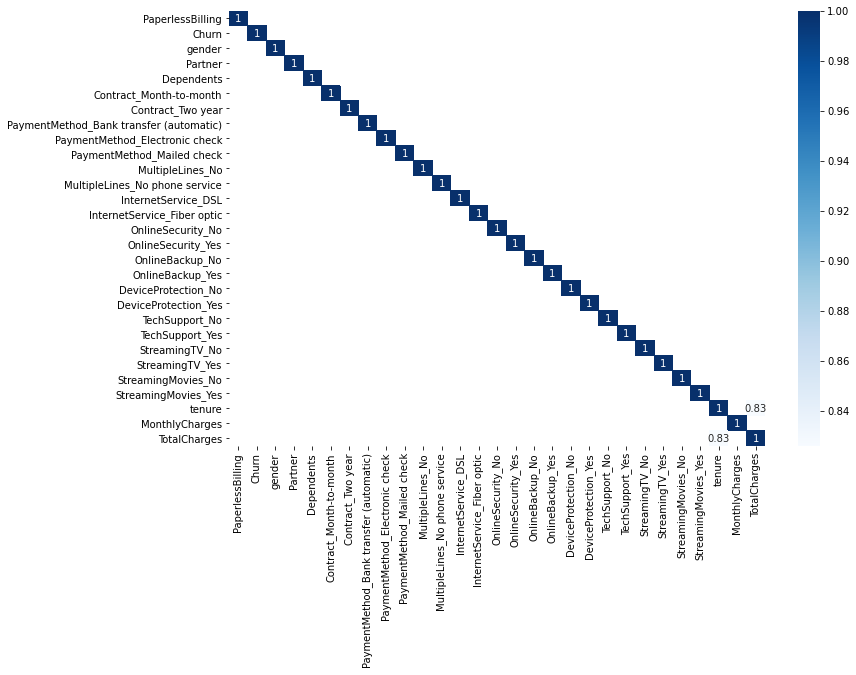

In [898]:
# Checking Heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(churn_data.corr()[(churn_data.corr() > 0.75)|(churn_data.corr() < -0.75)], annot = True, cmap = 'Blues')

In [899]:
# Dropping Highly correlated columns
churn_data.drop(['tenure'], axis = 1, inplace = True)
churn_data.shape

(7021, 28)

In [900]:
# Checking Churn Rate
churn_data['Churn'].value_counts(normalize = True)*100

0.0    73.422589
1.0    26.577411
Name: Churn, dtype: float64

In [901]:
# We have almost 27% churn rate

In [902]:
churn_data.shape

(7021, 28)

### Splitting Data

In [903]:
X = churn_data.drop(['Churn'], axis = 1)
y = churn_data['Churn']

print(X.shape, y.shape)

(7021, 27) (7021,)


In [904]:
X.isnull().sum()

PaperlessBilling                           0
gender                                     0
Partner                                    0
Dependents                                 0
Contract_Month-to-month                    0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
MultipleLines_No                           0
MultipleLines_No phone service             0
InternetService_DSL                        0
InternetService_Fiber optic                0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSupport_Yes                            0
StreamingTV_No                             0
StreamingT

In [905]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
print(X_train.shape, X_test.shape)

(5616, 27) (1405, 27)


### Model Building

In [907]:
import statsmodels.api as sm

In [909]:
# Logistic regression model
logreg1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
logreg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5594
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2440.0
Date:                Mon, 03 Aug 2020   Deviance:                       4880.1
Time:                        11:49:42   Pearson chi2:                 5.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.1047      0.192    -16.204      0.000      -3.480      -2.729
PaperlessBilling                            0.2673      0.081      3.307      0.001       0.109       0.426
gender                                     -0.0493      0.071     -0.698      0.485      -0.188       0.089
Partner                                    -0.1858      0.082     -2.252      0.024      -0.347      -0.024
Dependents                                 -0.2029      0.097     -2.098      0.036      -0.393      -0.013
Contract_Month-to-month                     1.2302      0.109     11.282      0.000       1.017       1.444
Contract_Two year                          -1.0596      0.191     -5.546      0.000      -1.434      -0.685
PaymentMethod_Bank transfer (automatic)     0.1109      0.124      0.892      0.372      -0.133       0.354
PaymentMethod_Electronic check              0.5670      0.105      5.377      0.000       0.360       0.774
PaymentMethod_Mailed check                  0.3145      0.125      2.507      0.012       0.069       0.560
MultipleLines_No                           -0.0116      0.082     -0.141      0.888      -0.173       0.150
MultipleLines_No phone service              0.3057      0.145      2.108      0.035       0.021       0.590
InternetService_DSL                        -0.2672      0.054     -4.933      0.000      -0.373      -0.161
InternetService_Fiber optic                 0.5165      0.053      9.658      0.000       0.412       0.621
OnlineSecurity_No                           0.3975      0.047      8.394      0.000       0.305       0.490
OnlineSecurity_Yes                         -0.1481      0.052     -2.849      0.004      -0.250      -0.046
OnlineBackup_No                             0.3197      0.043      7.471      0.000       0.236       0.404
OnlineBackup_Yes                           -0.0704      0.046     -1.523      0.128      -0.161       0.020
DeviceProtection_No                         0.1907      0.045      4.229      0.000       0.102       0.279
DeviceProtection_Yes                        0.0586      0.048      1.225      0.221      -0.035       0.152
TechSupport_No                              0.3123      0.048      6.490      0.000       0.218       0.407
TechSupport_Yes                            -0.0629      0.052     -1.214      0.225      -0.165       0.039
StreamingTV_No                              0.0495      0.046      1.075      0.282      -0.041       0.140
StreamingTV_Yes                             0.1999      0.048      4.173      0.000       0.106       0.294
StreamingMovies_No                          0.0157      0.046      0.342      0.732      -0.074       0.106
StreamingMovies_Yes                         0.2337      0.0

### Feature Selection using RFE

In [910]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)


D:\ProgramFiles\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True False  True False  True  True False  True  True False  True  True
  True  True  True  True False False False  True False False  True False
  True False False]
[ 1 10  1  3  1  1  5  1  1 13  1  1  1  1  1  1  6  2  7  1  4 12  1 11
  1  9  8]


In [911]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('PaperlessBilling', True, 1),
 ('gender', False, 10),
 ('Partner', True, 1),
 ('Dependents', False, 3),
 ('Contract_Month-to-month', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 5),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', True, 1),
 ('MultipleLines_No', False, 13),
 ('MultipleLines_No phone service', True, 1),
 ('InternetService_DSL', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_No', True, 1),
 ('OnlineBackup_Yes', False, 6),
 ('DeviceProtection_No', False, 2),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', False, 4),
 ('StreamingTV_No', False, 12),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No', False, 11),
 ('StreamingMovies_Yes', True, 1),
 ('MonthlyCharges', False, 9),
 ('TotalCharges', False, 8)]

In [912]:
# Selecting top 50 Features
col = X.columns[rfe.support_]
print(list(col))

['PaperlessBilling', 'Partner', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'MultipleLines_No phone service', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'TechSupport_No', 'StreamingTV_Yes', 'StreamingMovies_Yes']


In [916]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [917]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train_rfe, y_train)

LogisticRegression(C=1000000000.0)

In [918]:
import  statsmodels.api as sm
logreg2 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logreg2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5616
Model:                            GLM   Df Residuals:                     5601
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2445.1
Date:                Mon, 03 Aug 2020   Deviance:                       4890.2
Time:                        12:08:23   Pearson chi2:                 5.51e+03
No. Iterations:                    55                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.1407      0.162    -19.375      0.000      -3.458      -2.823
PaperlessBilling                   0.2677      0.081      3.325      0.001       0.110       0.426
Partner                           -0.2633      0.075     -3.532      0.000      -0.409      -0.117
Contract_Month-to-month            1.2620      0.108     11.683      0.000       1.050       1.474
Contract_Two year                 -1.0764      0.191     -5.642      0.000      -1.450      -0.702
PaymentMethod_Electronic check     0.5236      0.083      6.331      0.000       0.362       0.686
PaymentMethod_Mailed check         0.2596      0.107      2.429      0.015       0.050       0.469
MultipleLines_No phone service     0.3148      0.134      2.357      0.018       0.053       0.577
InternetService_DSL               -0.2294      0.092     -2.494      0.013      -0.410      -0.049
InternetService_Fiber optic        0.5695      0.096      5.951      0.000       0.382       0.757
OnlineSecurity_No                  0.4448      0.089      4.998      0.000       0.270       0.619
OnlineSecurity_Yes                -0.1047      0.095     -1.101      0.271      -0.291       0.082
OnlineBackup_No                    0.3973      0.080      4.987      0.000       0.241       0.553
TechSupport_No                     0.3896      0.092      4.243      0.000       0.210       0.570
StreamingTV_Yes                    0.1329      0.085      1.572      0.116      -0.033       0.299
StreamingMovies_Yes                0.2082      0.084      2.470      0.014       0.043       0.374
==================================================================================================
"""

### Predicting

In [925]:
y_train_pred = logsk.predict(X_train_rfe)
y_train_pred.shape

(5616,)

In [926]:
y_test_pred = logsk.predict(X_test[col])
y_test_pred.shape

(1405,)

In [927]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [928]:
def evaluate_model(model):
    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test[col])
    print("Train_Accuracy_Score :", accuracy_score(y_train, y_train_pred))
    print("Test_Accuracy_Score :", accuracy_score(y_test, y_test_pred))
    print("*"*50)
    print(confusion_matrix(y_test, y_test_pred))
    print("*"*50)
    print(classification_report(y_test, y_test_pred))
    

In [929]:
evaluate_model(logsk)

Train_Accuracy_Score : 0.7849002849002849
Test_Accuracy_Score : 0.7822064056939502
**************************************************
[[912 149]
 [157 187]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1061
         1.0       0.56      0.54      0.55       344

    accuracy                           0.78      1405
   macro avg       0.70      0.70      0.70      1405
weighted avg       0.78      0.78      0.78      1405



### Predicting Probabilities

In [987]:
y_test_proba = logsk.predict_proba(X_test[col])
y_train_proba = logsk.predict_proba(X_train_rfe)

In [988]:
train_df = pd.DataFrame({'Y_values': y_train, 'Y_proba' :y_train_proba[:, 1]})
train_df.head()

,Y_values,Y_proba
3274,0.0,0.566617
6261,0.0,0.011203
1327,1.0,0.270132
5198,1.0,0.409320
4078,1.0,0.050199


In [989]:
train_df['new_Y'] = train_df['Y_proba'].apply(lambda x: 0 if x < 0.5 else 1)
train_df.head()

,Y_values,Y_proba,new_Y
3274,0.0,0.566617,1
6261,0.0,0.011203,0
1327,1.0,0.270132,0
5198,1.0,0.409320,0
4078,1.0,0.050199,0


In [990]:
print("Train_Accuracy_Score :", accuracy_score(y_train, train_df['new_Y']))
print("*"*50)
print(confusion_matrix(y_train, train_df['new_Y']))
print("*"*50)
print(classification_report(y_train, train_df['new_Y']))

Train_Accuracy_Score : 0.7849002849002849
**************************************************
[[3601  493]
 [ 715  807]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      4094
         1.0       0.62      0.53      0.57      1522

    accuracy                           0.78      5616
   macro avg       0.73      0.70      0.71      5616
weighted avg       0.78      0.78      0.78      5616



In [991]:
y_test_proba[:, 1]

array([0.47970396, 0.29732811, 0.01469176, ..., 0.10574535, 0.15632609,
       0.29732811])

In [992]:
y_test

3916    0.0
2467    0.0
2884    0.0
3767    0.0
3751    0.0
       ... 
3834    1.0
3187    0.0
3094    0.0
2584    0.0
1457    0.0
Name: Churn, Length: 1405, dtype: float64

In [993]:
y_train_proba[:, 1]

array([0.56661694, 0.01120259, 0.27013152, ..., 0.54098054, 0.04146163,
       0.51331116])

In [994]:
test_df = pd.DataFrame({'Y_values': y_test, 'Y_proba': y_test_proba[:, 1]})
test_df.head()

,Y_values,Y_proba
3916,0.0,0.479704
2467,0.0,0.297328
2884,0.0,0.014692
3767,0.0,0.046997
3751,0.0,0.338242


In [995]:
test_df['new_Y'] = test_df['Y_proba'].apply(lambda x: 0 if x < 0.5 else 1)
test_df.head()

,Y_values,Y_proba,new_Y
3916,0.0,0.479704,0
2467,0.0,0.297328,0
2884,0.0,0.014692,0
3767,0.0,0.046997,0
3751,0.0,0.338242,0


In [996]:
print("Test_Accuracy_Score :", accuracy_score(y_test, test_df['new_Y']))

Test_Accuracy_Score : 0.7822064056939502


In [997]:
print("Train_Accuracy_Score :", accuracy_score(y_test, test_df['new_Y']))
print("*"*50)
print(confusion_matrix(y_test, test_df['new_Y']))
print("*"*50)
print(classification_report(y_test, test_df['new_Y']))

Train_Accuracy_Score : 0.7822064056939502
**************************************************
[[912 149]
 [157 187]]
**************************************************
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1061
         1.0       0.56      0.54      0.55       344

    accuracy                           0.78      1405
   macro avg       0.70      0.70      0.70      1405
weighted avg       0.78      0.78      0.78      1405



In [998]:
predicted_df = pd.concat([test_df, train_df], axis = 0)
predicted_df.head()

,Y_values,Y_proba,new_Y
3916,0.0,0.479704,0
2467,0.0,0.297328,0
2884,0.0,0.014692,0
3767,0.0,0.046997,0
3751,0.0,0.338242,0


In [999]:
predicted_df.shape

(7021, 3)

In [1000]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

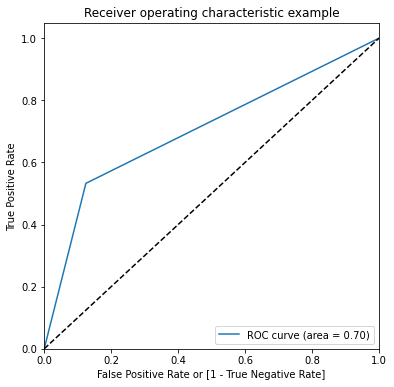

(array([0.        , 0.12453928, 1.        ]),
 array([0.        , 0.53269025, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [1001]:
draw_roc(predicted_df['Y_values'],predicted_df['new_Y'])

In [1002]:
metrics.roc_auc_score(predicted_df['Y_values'], predicted_df['new_Y'])

0.7040754821331853

### PCA o the Data

In [1003]:
X_train.shape

(5616, 27)

In [1004]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(random_state=42)

In [1005]:
# Components of PCA
pca.components_

array([[ 9.06787299e-03,  4.42867728e-03,  8.75493032e-03,
         3.50932833e-03, -1.71923717e-02,  1.92194920e-02,
         7.57357106e-03, -8.14441267e-03, -1.64463982e-02,
        -1.55723608e-02, -4.42217784e-03, -7.42707067e-03,
         2.42784234e-02,  5.50516662e-04,  1.63008361e-02,
        -5.58847755e-03,  2.24398303e-02, -1.12645574e-02,
         2.81159102e-02, -7.95031532e-03,  2.48016681e-02,
        -2.27136695e-02,  3.95650223e-02, -1.95835000e-02,
         3.64348528e-02,  7.02285219e-01,  7.06009938e-01],
       [-1.48374198e-01,  5.95864657e-03,  1.66806629e-01,
         1.54656582e-01, -3.57412891e-01,  2.63487726e-01,
         8.43224045e-02, -2.28974411e-01,  6.68367887e-02,
         6.37875177e-03, -6.94181716e-03,  1.54069413e-02,
        -2.22141548e-01, -3.33376508e-01,  1.26641902e-01,
        -2.81778405e-01,  7.50437990e-02, -3.25020789e-01,
         1.18286183e-01, -3.57700270e-01,  1.50965664e-01,
        -2.49147430e-01,  4.24128234e-02, -2.52022049e-

In [1006]:
# Explained Variance Ratio
evr = pca.explained_variance_ratio_
evr

array([2.18434006e-01, 1.37415897e-01, 1.02306612e-01, 7.28865374e-02,
       4.63585401e-02, 4.57630248e-02, 4.08039437e-02, 3.68106948e-02,
       3.57068023e-02, 3.43478197e-02, 3.26326293e-02, 3.06545899e-02,
       2.95559527e-02, 2.71695559e-02, 2.49863932e-02, 2.38439924e-02,
       2.07861143e-02, 1.49672264e-02, 1.03541640e-02, 7.27440418e-03,
       6.94109946e-03, 4.99413886e-32, 3.07797462e-32, 1.54339484e-32,
       5.34719221e-33, 2.52332377e-33, 1.13845242e-33])

In [1007]:
var_cum = np.cumsum(evr)
var_cum

array([0.21843401, 0.3558499 , 0.45815652, 0.53104305, 0.57740159,
       0.62316462, 0.66396856, 0.70077926, 0.73648606, 0.77083388,
       0.80346651, 0.8341211 , 0.86367705, 0.89084661, 0.915833  ,
       0.93967699, 0.96046311, 0.97543033, 0.9857845 , 0.9930589 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

### Scree Plot for Explained Variance

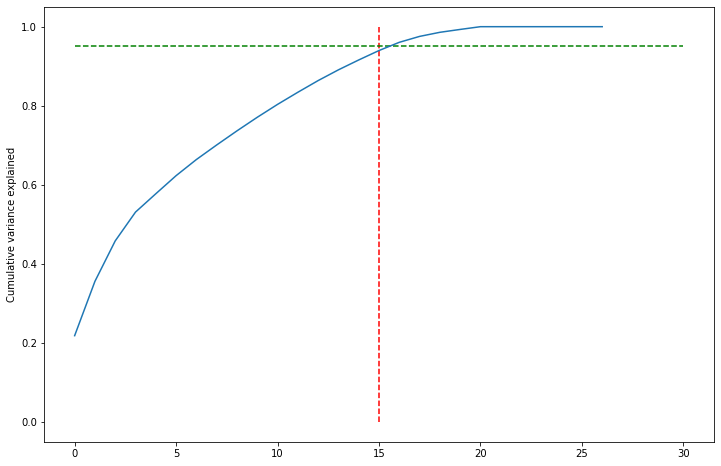

In [1009]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

### Perform PCA with 16 components

In [1013]:
from sklearn.decomposition import IncrementalPCA

In [1014]:
pca_final = IncrementalPCA(n_components = 16)
pca_final

IncrementalPCA(n_components=16)

In [1015]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(5616, 16)

In [1016]:
corr_matrix = np.corrcoef(df_train_pca.T)
corr_matrix

array([[ 1.00000000e+00, -1.18950446e-05, -7.06296531e-07,
        -4.14895022e-05,  5.66549361e-05,  1.01638236e-05,
         1.12274166e-04, -5.46622508e-05,  1.68645063e-05,
        -3.70627418e-05,  8.05751016e-06, -5.84847883e-05,
        -1.08671960e-04, -8.66172500e-05, -5.59641241e-05,
        -3.59612261e-05],
       [-1.18950446e-05,  1.00000000e+00,  4.44025145e-06,
         4.67404095e-05, -1.13884355e-04,  2.96193622e-05,
        -1.25586927e-04,  1.77087104e-04,  2.94200000e-06,
         7.31132085e-05, -6.07539203e-06,  4.00899327e-05,
         1.85865742e-04, -5.54875196e-05,  1.88366929e-04,
         3.08883485e-04],
       [-7.06296531e-07,  4.44025145e-06,  1.00000000e+00,
        -8.12349091e-06, -5.18993285e-06, -1.42060367e-05,
        -6.36674938e-05,  4.33306245e-05,  2.05262623e-05,
        -1.12976373e-05, -9.90779710e-05, -1.55200329e-05,
         4.91584660e-05, -1.07715346e-04,  5.65497359e-05,
         1.90635255e-04],
       [-4.14895022e-05,  4.67404095e

In [1017]:
corr_matrix.shape

(16, 16)

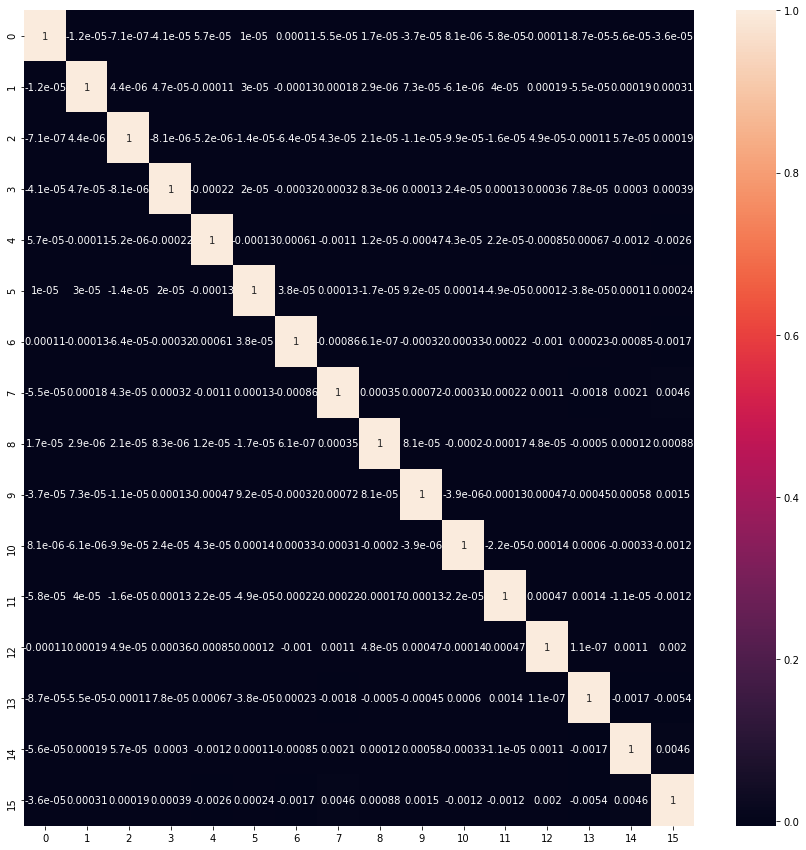

In [1018]:
plt.figure(figsize=[15,15])
sns.heatmap(corr_matrix, annot=True)

#### Applying Transformation on Test Set

In [1019]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(1405, 16)

### Apply Logistic Regression on data on Principal Components

In [1020]:
from sklearn.linear_model import LogisticRegression
logistic_pca = LogisticRegression()
logistic_model = logistic_pca.fit(df_train_pca, y_train)

#### Making Predictions on Test data

In [1023]:
y_pred_pca = logistic_model.predict(df_test_pca)
y_pred_pca

array([1., 0., 0., ..., 0., 0., 0.])

In [1025]:
# predicting Probabilities
pred_probs_test = logistic_model.predict_proba(df_test_pca)
pred_probs_test

array([[0.4550095 , 0.5449905 ],
       [0.71863139, 0.28136861],
       [0.98577637, 0.01422363],
       ...,
       [0.81944199, 0.18055801],
       [0.78450166, 0.21549834],
       [0.70684197, 0.29315803]])

In [1026]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.82'

In [1028]:
print("Accuracy Score :", accuracy_score(y_test, y_pred_pca))

Accuracy Score : 0.7857651245551601


In [1030]:
confusion_matrix(y_test, y_pred_pca)

array([[921, 140],
       [161, 183]], dtype=int64)

In [1032]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1061
         1.0       0.57      0.53      0.55       344

    accuracy                           0.79      1405
   macro avg       0.71      0.70      0.70      1405
weighted avg       0.78      0.79      0.78      1405

